In [1]:
import pandas as pd

In [3]:
df=pd.read_csv(r"C:\Users\nirma\Downloads\Social_Network_Ads (3).csv")

In [5]:
import numpy as np

In [9]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [11]:
df.tail(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
390,15807837,Male,48,33000,1
391,15592570,Male,47,23000,1
392,15748589,Female,45,45000,1
393,15635893,Male,60,42000,1
394,15757632,Female,39,59000,0
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [13]:
df['Gender']=df['Gender'].map({'Female':0,'Male':1})

In [15]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
49,15793813,0,31,89000,0
81,15668385,1,39,42000,0
212,15707596,0,59,42000,0
377,15800215,0,42,53000,0
65,15718071,1,24,58000,0


In [17]:
df.drop(columns=['User ID'],axis=1)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [23]:
from sklearn.model_selection import cross_val_score
df.corr()

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000


In [25]:
import seaborn as sns

<Axes: >

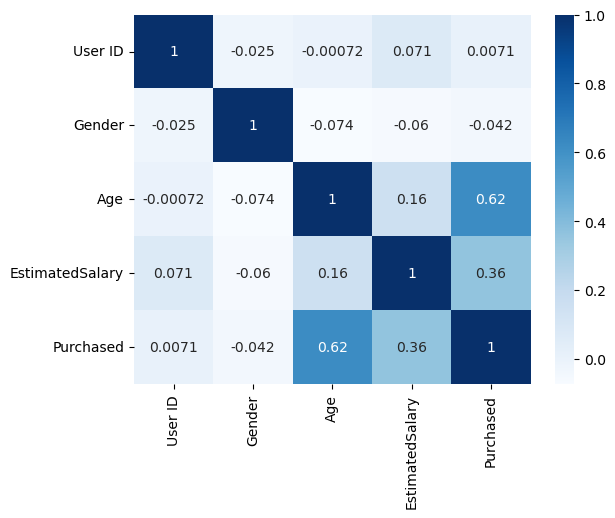

In [27]:
sns.heatmap(df.corr(),annot= True,cmap='Blues')

In [29]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [37]:
log_reg=LogisticRegression()
Knn=KNeighborsClassifier()

In [61]:
x=df.iloc[:,:-1] 
y=df.iloc[:,-1] 

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [73]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [75]:
y_pred=log_reg.predict(x_test)

In [77]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [87]:
acc=accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

In [89]:
f"my model performance on logistic regression is accuracy {acc} , classification report is {cr} nad confusionmatrix is {cm}"

'my model performance on logistic regression is accuracy 0.9125 , classification report is               precision    recall  f1-score   support\n\n           0       0.92      0.97      0.94        58\n           1       0.89      0.77      0.83        22\n\n    accuracy                           0.91        80\n   macro avg       0.91      0.87      0.89        80\nweighted avg       0.91      0.91      0.91        80\n nad confusionmatrix is [[56  2]\n [ 5 17]]'

In [91]:
cr

'              precision    recall  f1-score   support\n\n           0       0.92      0.97      0.94        58\n           1       0.89      0.77      0.83        22\n\n    accuracy                           0.91        80\n   macro avg       0.91      0.87      0.89        80\nweighted avg       0.91      0.91      0.91        80\n'

In [93]:
cm

array([[56,  2],
       [ 5, 17]], dtype=int64)

In [95]:
acc

0.9125

In [97]:
import matplotlib.pyplot as plt
k_range = range(1,21,2)
mean_accuracies = []

In [99]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    mean_accuracies.append(accuracy)

In [101]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
mean_accuracies.append(scores.mean())                         

In [103]:
k_range=range(1, 21)
mean_accuracies = []

In [115]:
for k in k_range:#try with different k values
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test) 
    accuracy = accuracy_score(y_test, y_pred) 
    #computing cross valodation
    scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy')
    mean_accuracies.append(scores.mean()) 

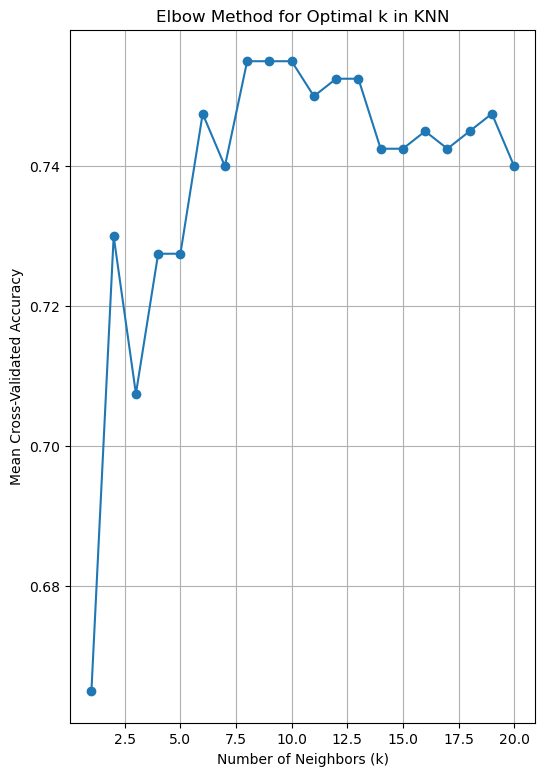

In [121]:
#plotting the k value
plt.figure(figsize=(6, 9))
plt.plot(k_range, mean_accuracies, marker='o')
plt.title('Elbow Method for Optimal k in KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.grid(True)
plt.show()

In [123]:
f"my model performance on k nearest neighbor classifier is accuracy {acc} , classification report is {cr} nad confusion matrix is {cm}"

'my model performance on k nearest neighbor classifier is accuracy 0.9125 , classification report is               precision    recall  f1-score   support\n\n           0       0.92      0.97      0.94        58\n           1       0.89      0.77      0.83        22\n\n    accuracy                           0.91        80\n   macro avg       0.91      0.87      0.89        80\nweighted avg       0.91      0.91      0.91        80\n nad confusion matrix is [[56  2]\n [ 5 17]]'

In [125]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


In [127]:
import pickle

In [129]:
with open ('Logistic_model.pk1', 'wb') as file:
           pickle.dump(log_reg,file)